# Loan Application Status

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

we have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset

df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/LoanApplication.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# check for any null values in the dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# fill in the null values with the mean of the features
df=df.fillna(df.mean())

In [6]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [7]:
df['Self_Employed'].fillna("No")

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [8]:
#since droping Credit history & Loan Amount Term doesnt impact our model building, we will drop it

df.drop(['Credit_History','Loan_Amount_Term','Loan_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,Urban,Y


In [10]:
# grouping numerical columns together

num_vars = [var for var in df.columns if df[var].dtypes !='O']
df[num_vars]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [11]:
# grouping categorical columns together
cat_vars = [var for var in df.columns if df[var].dtypes =='O']
df[cat_vars]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


### Bivariate Analysis

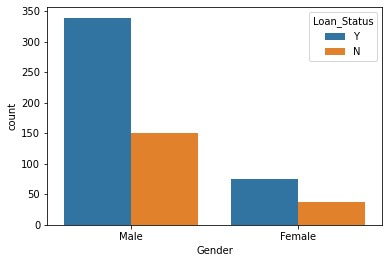

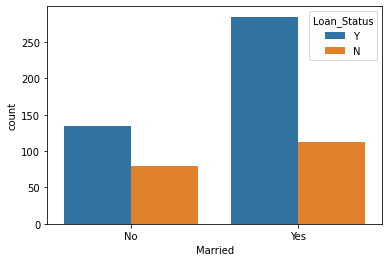

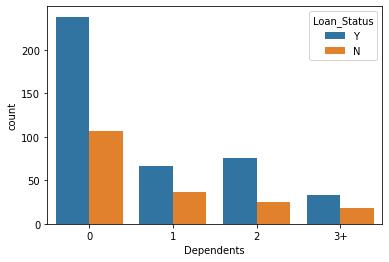

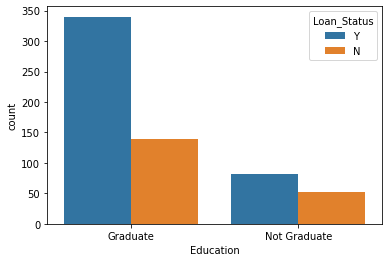

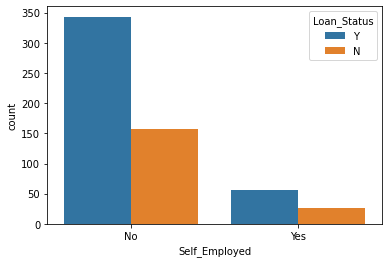

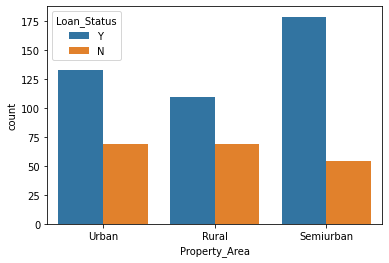

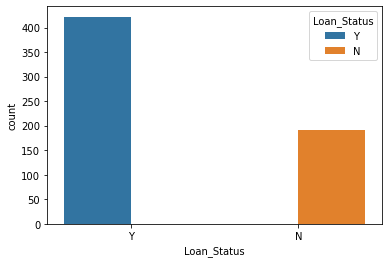

In [12]:
# counting the number of occurrences

for i in df[cat_vars]:
    sns.countplot(x=i,data=df[cat_vars],hue='Loan_Status')
    plt.show()

###### Inference:
1. Male count is high for either of the lOan Status
2. Majority of them who are married are getting Loans
3. Majority of un-married are getting Loans than the Majority of the married who are not getting the Loans
4. Majority if the people who are having no dependents are getting Loans than the people who are haing dependants
5. Most of them who are getting loans are graduates
6. According to analysis we have more number of non-selfEmployed who are getting Loans than Self Employed. ie, Self Employed are less likely to get the loans
7. people belonging to either Urban or Semi-Urban are getting loans
8. On an Avarage we have got majority of the people who get Loan than the one who gets no loan 

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

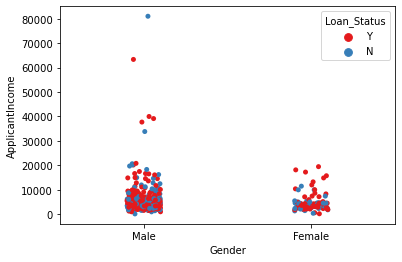

In [13]:
# plotting the distribution of observations

sns.stripplot(x='Gender',y='ApplicantIncome',data=df,jitter=True,hue='Loan_Status',palette='Set1')

###### According to analysis we have more number of males than females who are earning in range 0-10k are getting Loan sanctioned

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

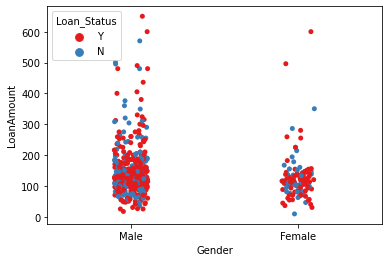

In [14]:
sns.stripplot(x='Gender',y='LoanAmount',data=df,jitter=True,hue='Loan_Status',palette='Set1')

###### According to Analysis, we have more number of males who take loans of 100-200 from bank

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

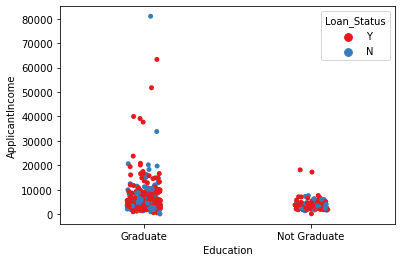

In [15]:
sns.stripplot(x='Education',y='ApplicantIncome',data=df,jitter=True,hue='Loan_Status',palette='Set1')

###### According to Analysis, we have more male graduates who earn 0-10k who got their Loan sanctioned

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

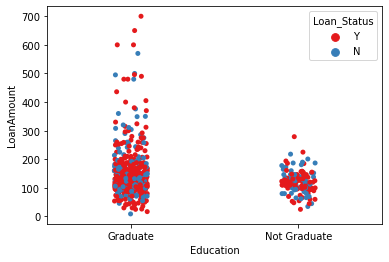

In [16]:
sns.stripplot(x='Education',y='LoanAmount',data=df,jitter=True,hue='Loan_Status',palette='Set1')

###### We have more number of Graduates who are applieing for Loans of amount 100-200 

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

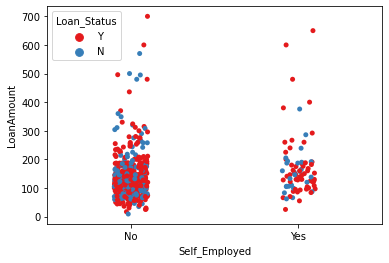

In [17]:
sns.stripplot(x='Self_Employed',y='LoanAmount',data=df,jitter=True,hue='Loan_Status',palette='Set1')

###### we have got maximum records for people who are working in private or public sector for an employee who takes Loans of about 100-200.
It figures are in Thousands or it may be in the year 90's according to my Analysis. 

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

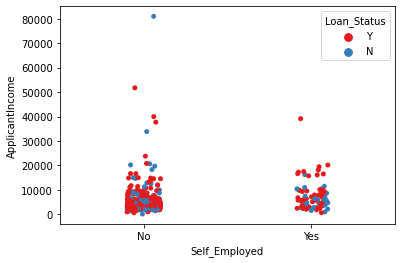

In [18]:
sns.stripplot(x='Self_Employed',y='ApplicantIncome',data=df,jitter=True,hue='Loan_Status',palette='Set1')

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

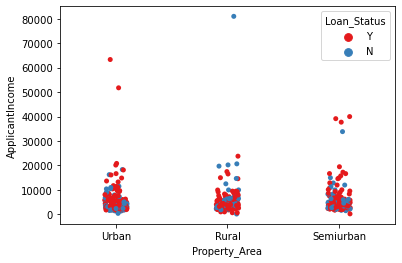

In [19]:
sns.stripplot(x='Property_Area',y='ApplicantIncome',data=df,jitter=True,hue='Loan_Status',palette='Set1')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

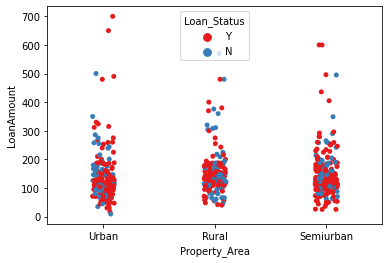

In [20]:
sns.stripplot(x='Property_Area',y='LoanAmount',data=df,jitter=True,hue='Loan_Status',palette='Set1')

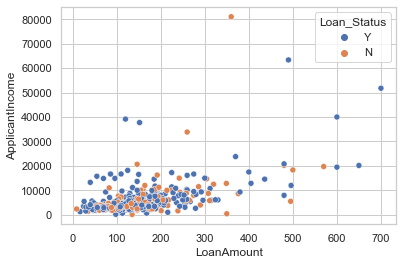

In [21]:
sns.set(style='whitegrid')
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=df,hue='Loan_Status')
plt.show()

Most of the Loan Applicants are having income <10k no matter whether Loan has sanctioned for them

In [22]:
# checking the shape of the data
df.shape

(614, 10)

#### Label encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_vars] = df[cat_vars].apply(le.fit_transform)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,0,0
2,1,1,0,0,1,3000,0.0,66.000000,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,2,1
4,1,0,0,0,0,6000,0.0,141.000000,2,1


In [25]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode())

In [26]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode())

In [27]:
df.nunique() 

Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Property_Area          3
Loan_Status            2
dtype: int64

### Univariate Analysis

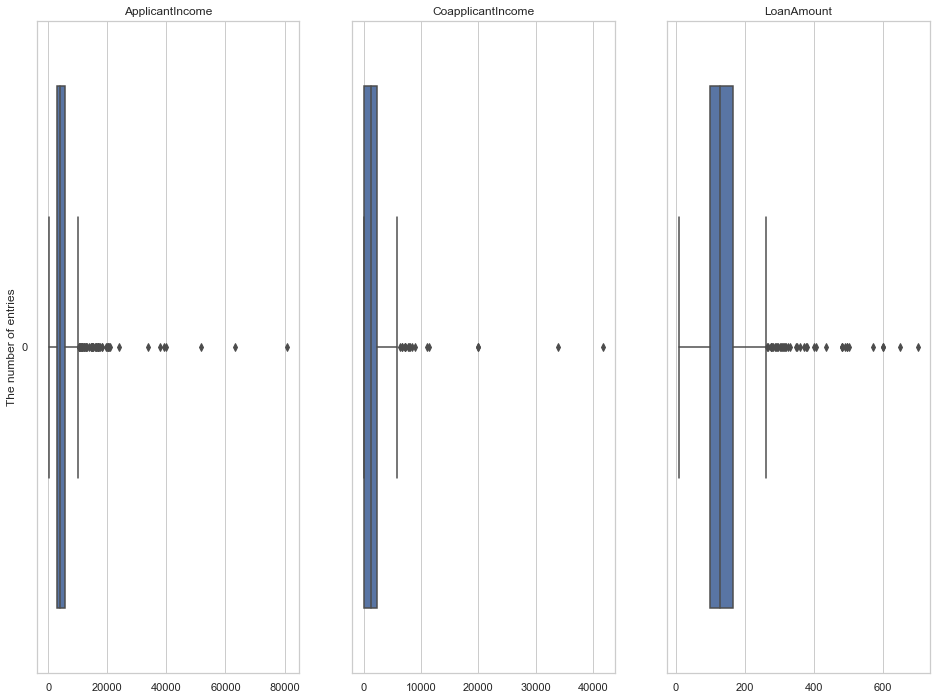

In [28]:
# check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=num_vars, rows=1, cols=3, subtitle='Boxplots before deleting outliers')

In [29]:
# deleting outliers
Q1 = df[num_vars].quantile(0.25)
Q3 = df[num_vars].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df= df[~((df[num_vars] < (Q1 - 1.5 * IQR)) |(df[num_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df.shape)

Here we will get IQR for each column
 ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
dtype: float64


(535, 10)

### Visualization

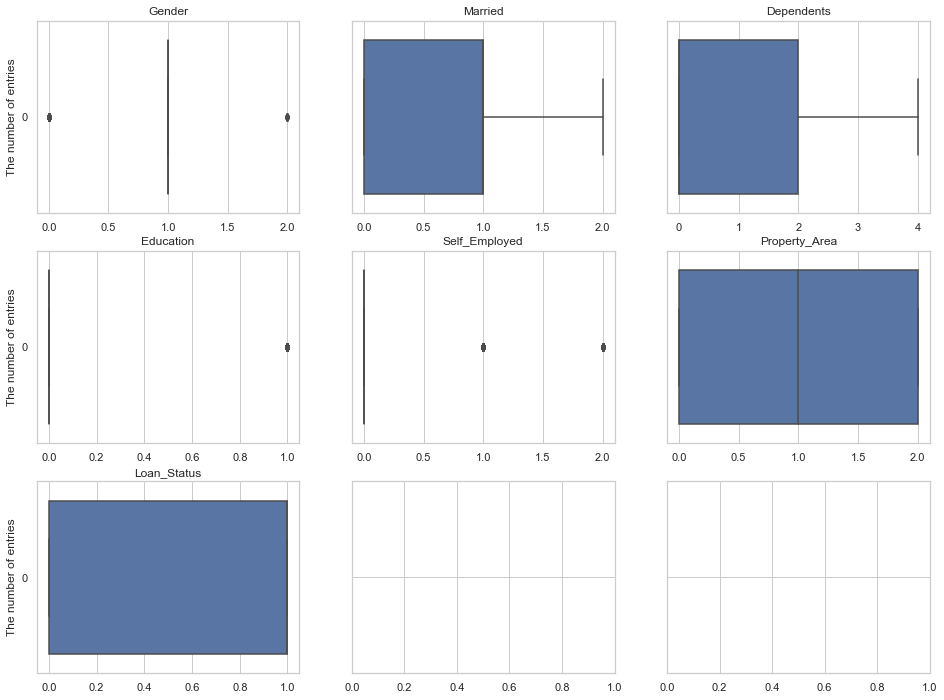

In [30]:
def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=cat_vars, rows=3, cols=3, subtitle='Boxplots before deleting outliers')

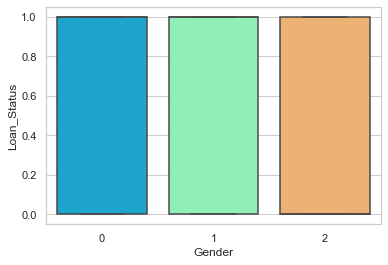

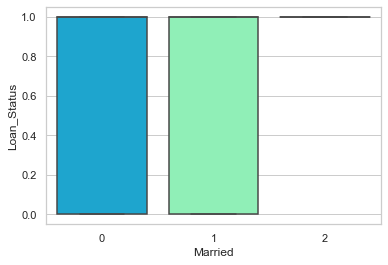

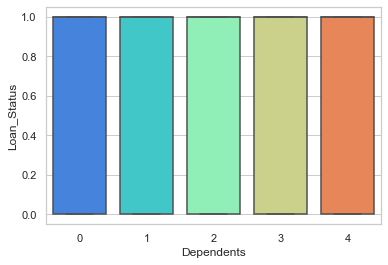

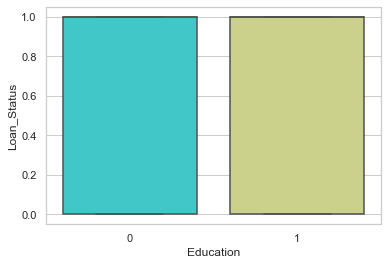

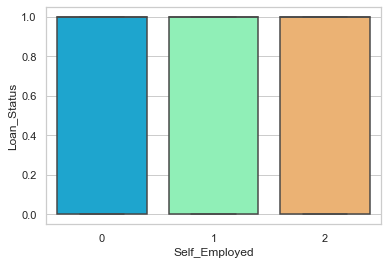

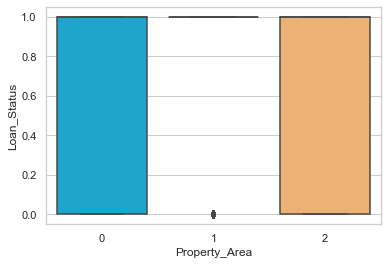

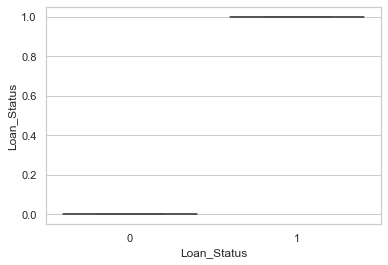

In [31]:
for i in df[cat_vars]:
    sns.boxplot(x=i,y='Loan_Status',data=df[cat_vars],palette='rainbow')
    plt.show()

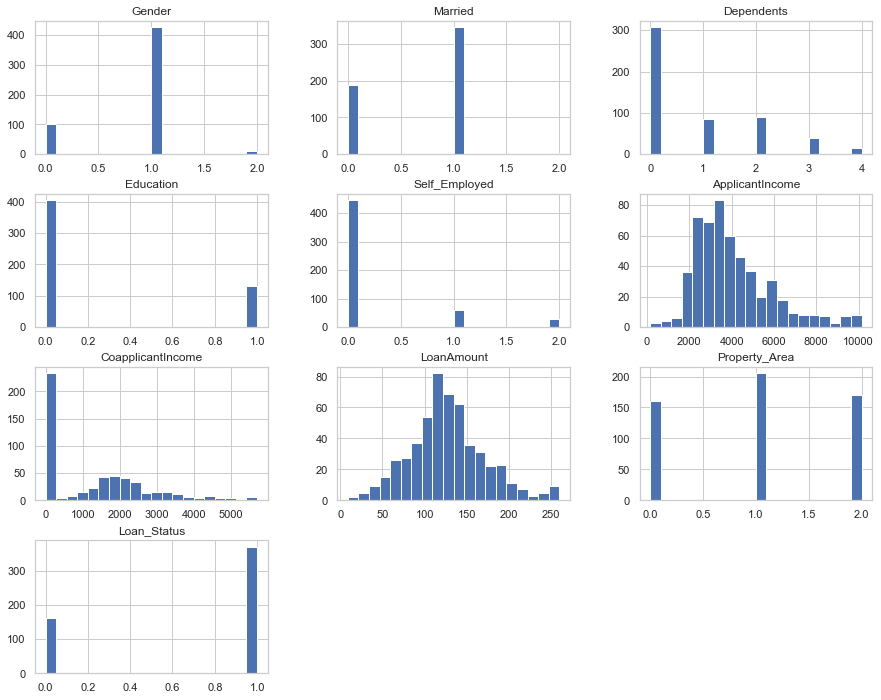

In [32]:
# histplot to check the skewness of the dataset

df.hist(bins=20,figsize=(15,12))
plt.show()

### MultiVariate Analysis

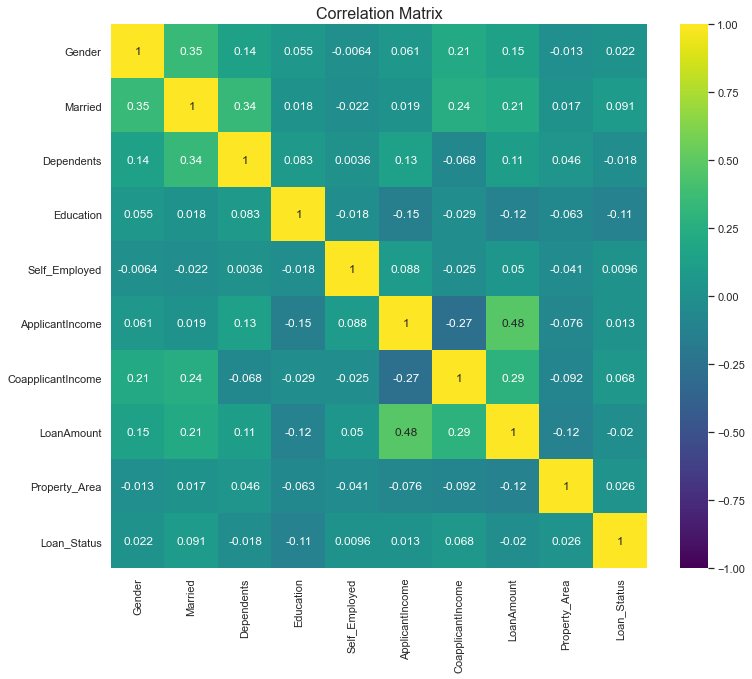

In [33]:
# Plotting heatmap to check the corelation between each feature set to Target

fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)
plt.show()

* Loan Amount will most probably having high corelation with Applicant Income, so Loan is sanctioned based on the Applicant income.
* if Applicant is having Low Income then Loan amount sanction will not be done. It all depends on Income.
* if Co-Applicant income or Applicant income is high then it will be easy for the applicant to get Loan sanctioned


In [34]:
#Removing skewness from numerical variables
df.skew()
from sklearn.preprocessing import power_transform
df[num_vars]=power_transform(df[num_vars],method='yeo-johnson')

In [35]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [36]:
#import al the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

###### Previously ran observation without resampling is that we have got imbalanced dataset where we got nill f1score for True 0's sample and  more than 0.8 f1score for 1's sample. So we are Resampling it before running any of our Algorithm to get optimised Accuracy score and F1score

### Resampling

In [37]:
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Loan_Status==0]
positive = train_data[train_data.Loan_Status==1]
# upsample minority
neg_upsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([positive, neg_upsampled])
# check new class counts
upsampled.Loan_Status.value_counts()

1    254
0    254
Name: Loan_Status, dtype: int64

In [38]:
upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
582,0,1,0,0,0,-0.382090,-1.142445,-2.277761,1,1
6,1,1,0,1,0,-0.989669,0.744776,-0.689879,2,1
133,1,1,0,0,1,-0.194927,-1.142445,-2.637199,1,1
51,0,0,0,0,0,-0.435259,-1.142445,-0.108173,1,1
19,1,1,0,0,2,-0.780592,1.053281,-0.221655,2,1


In [39]:
x=upsampled.iloc[:,:-1]
y=upsampled.iloc[:,-1:]

In [40]:
#import al the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold, cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

### Scaling the dataset

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_x=scaler.fit_transform(x_train)
standardized_xtest=scaler.fit_transform(x_test)
df_standardized = pd.DataFrame(data=standardized_x)
df_standardized.head()

,0,1,2,3,4,5,6,7,8
0,-2.035013,-1.299905,-0.697422,-0.53936,-0.412298,0.314347,-1.131736,0.199341,-0.013939
1,0.258414,0.751056,0.202886,-0.53936,-0.412298,-1.201657,-1.131736,-1.686296,-1.251061
2,0.258414,0.751056,1.103194,-0.53936,-0.412298,0.062404,1.097548,1.907589,1.223182
3,0.258414,-1.299905,-0.697422,-0.53936,3.293165,-0.282874,1.016670,0.756962,1.223182
4,0.258414,-1.299905,-0.697422,-0.53936,-0.412298,0.598769,-1.131736,0.061494,-1.251061


In [42]:
models= [('lr',LogisticRegression()),('rfc',RandomForestClassifier()),('etc',ExtraTreesClassifier()),('bgc',BaggingClassifier()),
        ('gbc',GradientBoostingClassifier()),('dtc',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),
        ('bnb',BernoulliNB()),('svc',SVC())]

In [43]:
#function to find crossValidation score of different models

def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=-1)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [44]:
basic_model_selection(standardized_x,y_train,10,models)

lr 0.5770634920634921
rfc 0.7775396825396825
etc 0.8055555555555556
bgc 0.7074603174603175
gbc 0.7042857142857143
dtc 0.7574603174603174
knn 0.6168253968253967
bnb 0.5518253968253968
svc 0.6336507936507937


### Hyperparameter tuning

In [46]:
# importing the required Libraries

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# defining parameters

param_grid_rfc = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'random_state':[30,42,0],
#     'max_depth':[2,1,0]
}
param_etc ={
     'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'random_state':[30,42,0],
    'max_depth':[2,1,0]
}
clf = GridSearchCV(RandomForestClassifier(),param_grid_rfc)
clf.fit(standardized_x,y_train)

rfcscore = cross_val_score(RandomForestClassifier(),standardized_x,y_train,cv=10)
rfcm = rfcscore.mean()
print('Cross Val Score of RFC:',rfcm*100)

print("Best Parameters %s" % clf.best_params_)

etc = GridSearchCV(ExtraTreesClassifier(),param_etc)
etc.fit(standardized_x,y_train)

etcscore = cross_val_score(ExtraTreesClassifier(),standardized_x,y_train,cv=10)
etcm = etcscore.mean()
print('Cross Val Score of ETC:',etcm*100)

print("Best Parameters %s" %etc.best_params_)

Cross Val Score of RFC: 77.49999999999999
Best Parameters {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 700, 'random_state': 30}
Cross Val Score of ETC: 80.57936507936509
Best Parameters {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 700, 'random_state': 30}


In [45]:
# implementing the model including best parameters

rfc= RandomForestClassifier(n_jobs=5,max_features= 'auto' ,n_estimators=700, oob_score = True,random_state=30,criterion='entropy')
rfc.fit(standardized_x, y_train)
rfc.score(standardized_x, y_train)
pred_rfc = rfc.predict(standardized_xtest)

rfcs= accuracy_score(y_test,pred_rfc)
print('Accuracy Score',rfcs*100)

Accuracy Score 78.43137254901961


In [46]:
print(classification_report(pred_rfc,y_test))
confusion_matrix(pred_rfc,y_test)

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        62
           1       0.87      0.75      0.80        91

    accuracy                           0.78       153
   macro avg       0.78      0.79      0.78       153
weighted avg       0.80      0.78      0.79       153



array([[52, 10],
       [23, 68]], dtype=int64)

In [47]:
ExtraTreesClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Plotting Impostances of ETC model

[0.06372942 0.04054684 0.08756651 0.03676282 0.06578744 0.22737007
 0.14544604 0.24298284 0.08980802]


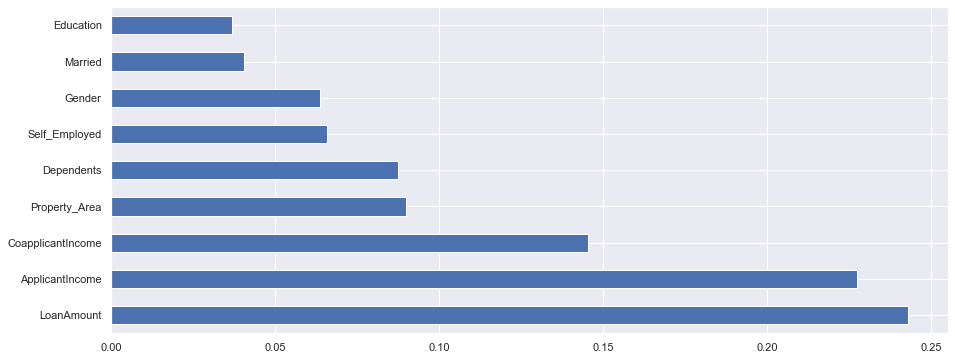

In [48]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(standardized_x,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [49]:
etc = ExtraTreesClassifier(n_jobs=5,max_features= 'auto' ,n_estimators=700, random_state=30,criterion='gini',max_depth=2)
etc.fit(standardized_x, y_train)
etc.score(standardized_x, y_train)
pred_etc = etc.predict(standardized_xtest)

etcs= accuracy_score(y_test,pred_etc)
print('Accuracy Score',etcs*100)

Accuracy Score 54.248366013071895


In [50]:
print(classification_report(pred_etc,y_test))
confusion_matrix(pred_etc,y_test)

              precision    recall  f1-score   support

           0       0.72      0.52      0.61       103
           1       0.37      0.58      0.45        50

    accuracy                           0.54       153
   macro avg       0.55      0.55      0.53       153
weighted avg       0.61      0.54      0.56       153



array([[54, 49],
       [21, 29]], dtype=int64)

### Oversampling

In [51]:
upsampled.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

x = upsampled.drop('Loan_Status',axis=1)
y = upsampled['Loan_Status']
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)
sm = SMOTE(random_state=27)
X_train, Y_train = sm.fit_resample(x_train, y_train)
X_train.shape, Y_train.shape

Y_train = pd.DataFrame(Y_train, columns = ['Loan_Status'])
Y_train.Loan_Status.value_counts()

0    193
1    193
Name: Loan_Status, dtype: int64

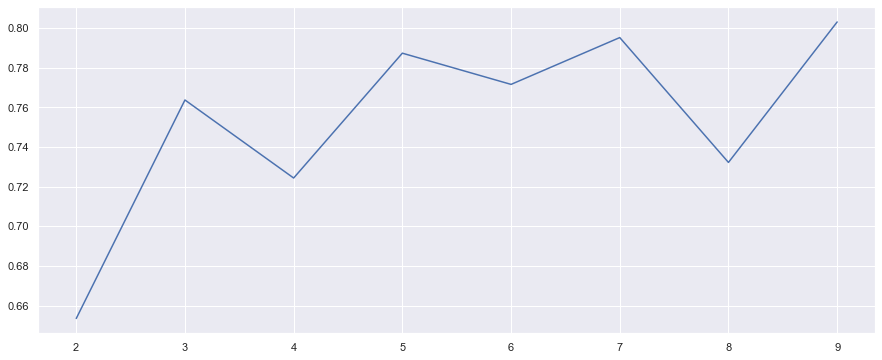

In [53]:
# finding optimum number of scores across n_estimators
list1=[]
for i in range(2,10):
    smote = RandomForestClassifier(n_jobs=5,max_features= 'auto' ,n_estimators=i, oob_score = True,random_state=30,criterion='entropy').fit(X_train,Y_train)
    smote.fit(x_train, y_train)
    smote_pred = smote.predict(x_test)
    list1.append(accuracy_score(y_test, smote_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [54]:
# f1 score
f1_score(y_test, smote_pred)

0.782608695652174

In [55]:
recall_score(y_test, smote_pred)

0.7377049180327869

###### We have got decent scores for recall,f1score after resampling for RandomForestCLassifier. So we will consider same to predict our Outcomes

In [56]:
predicted_df={"Predicted Loan_Status":smote_pred,"Original Loan_Status":y_test}
predicted_df=pd.DataFrame(predicted_df)
predicted_df.value_counts()

Predicted Loan_Status  Original Loan_Status
0                      0                       57
1                      1                       45
0                      1                       16
1                      0                        9
dtype: int64

In [57]:
pred_prob1 = rfc.predict_proba(x_test)
pred_prob2 = etc.predict_proba(x_test)
pred_prob3 = smote.predict_proba(x_test)

In [58]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.8310978638847492 0.7158469945355191 0.892200695479384


### ROC_Curve

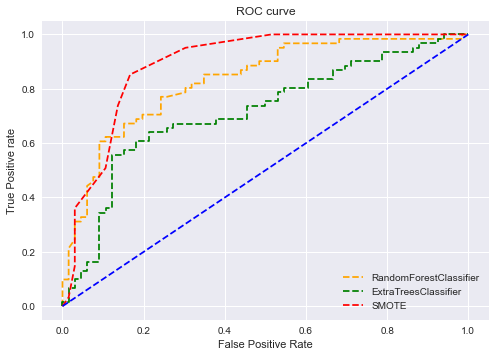

In [59]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='ExtraTreesClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='Red', label='SMOTE')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [60]:
predicted_df={"Predicted Loan_Status":smote_pred,"Original Loan_Status":y_test}
predicted_df=pd.DataFrame(predicted_df)
y_test.value_counts()

0    66
1    61
Name: Loan_Status, dtype: int64

In [61]:
import pickle
filename = 'Loan_Application.pkl'
pickle.dump(smote, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open('Loan_Application.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

80.31496062992126


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [64]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Predicted,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,1,1,1,0,1
Original,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,1


###### Conclusion:
 we have got most of the predicted and original values same with least errors in the dataset. we can fine tune it using different parameters while Hyper parameter tuning